**Problem 1 (50 points)**

Write a function that converts the temperature in degrees Fahrenheit (⁰F) to degrees Celsius (⁰C) and to Kelvin (K).  
Using this function, plot a graph showing the variation in temperature in ⁰C and in K as the temperature in ⁰F varies 
from 0 to 250°F. 

Make appropriate comments.  

Tip: Python functions are defined using the **def** keyword.


In [1]:
# library imports
import numpy as np # to work with numerical data
import matplotlib.pyplot as plt # to plot graphs

In [2]:
N = 250 # number of temperatures
x = np.arange(0, N+1, 1) # temperature array

In [4]:
# conversion functions - from Fahrenheit to Celsius
def fahrenheit_to_celsius(x):
    '''Converts Fahrenheit to Celsius
    Args:
        x (float): temperature in Fahrenheit
    Returns:
        float: temperature in Celsius   

        Equation: (x - 32) * (5 / 9)
    '''
    return (x - 32) * (5 / 9)

# conversion functions - from Fahrenheit to Kelvin
def fahrenheit_to_kelvin(x):
    '''Converts Fahrenheit to Kelvin
    Args:
        x (float): temperature in Fahrenheit
    Returns:
        float: temperature in Kelvin

        Equation: (x - 32) * (5 / 9) + 273.15
    '''
    return fahrenheit_to_celsius(x) + 273.15

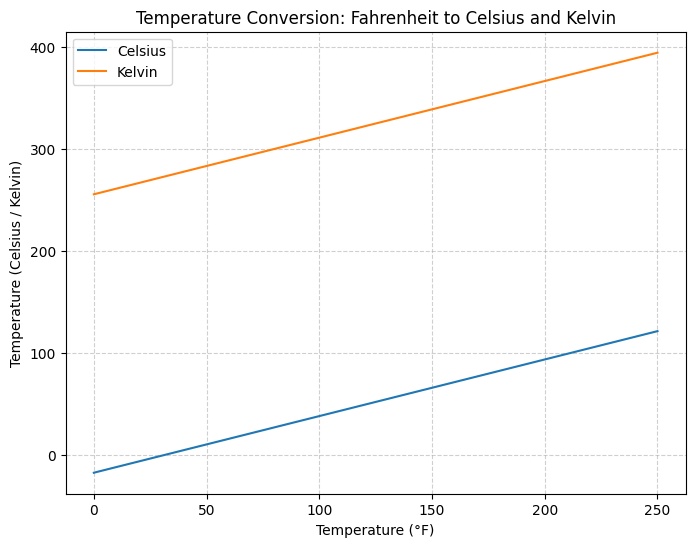

In [30]:
# Figure
# figure with size 8x6 inches
plt.figure(figsize=(8,6))

# plot the conversion functions
plt.plot(x, fahrenheit_to_celsius(x))
plt.plot(x, fahrenheit_to_kelvin(x))

# add title and labels
plt.title("Temperature Conversion: Fahrenheit to Celsius and Kelvin")
plt.xlabel("Temperature (°F)")
plt.ylabel("Temperature (Celsius / Kelvin)")
plt.legend(["Celsius", "Kelvin"])

# Add grid, legend, and improve visualization
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

**Problem 2 (50 points)**

Model, using difference equations, the trajectory (height x distance) of a projectile launched at an angle α0, from a height h_0, and with a velocity v0. 

Assume:
h0 = 10 m; 
v0 = 20 m/s. 

Perform the calculations for the scenarios with α0 = 0, 30°, 45°, and 60°, neglecting air resistance.  

Assume, for all four scenarios, time steps of 0.1, 0.5, and 1 seconds (three curves) and make appropriate comments.


In [41]:
def discrete_difference_model_trajectory(a, v0 = 20, step=0.1, max_time=20, g=9.8):
    x = dict()                  # Distance
    y = dict()                  # Height
    v_y = dict()                # Velocity on the height axis
    v_x = dict()                # Velocity on the distance axis
    v_x[0] = v0 * np.cos(a)
    v_y[0] = v0 * np.sin(a)
    x[0] = 0
    y[0] = 10
    
    t = np.arange(0, 10, step)
    
    for n in range(len(t)):
        v_x[n+1] = v_x[n]
        v_y[n+1] = v_y[n] - (g * step)
        x[n+1] = x[n] + (v_x[n] * step)
        y[n+1] = y[n] + (v_y[n] * step)
        
        if y[n+1] <= 0:
            break
        
    return v_x, v_y, x, y

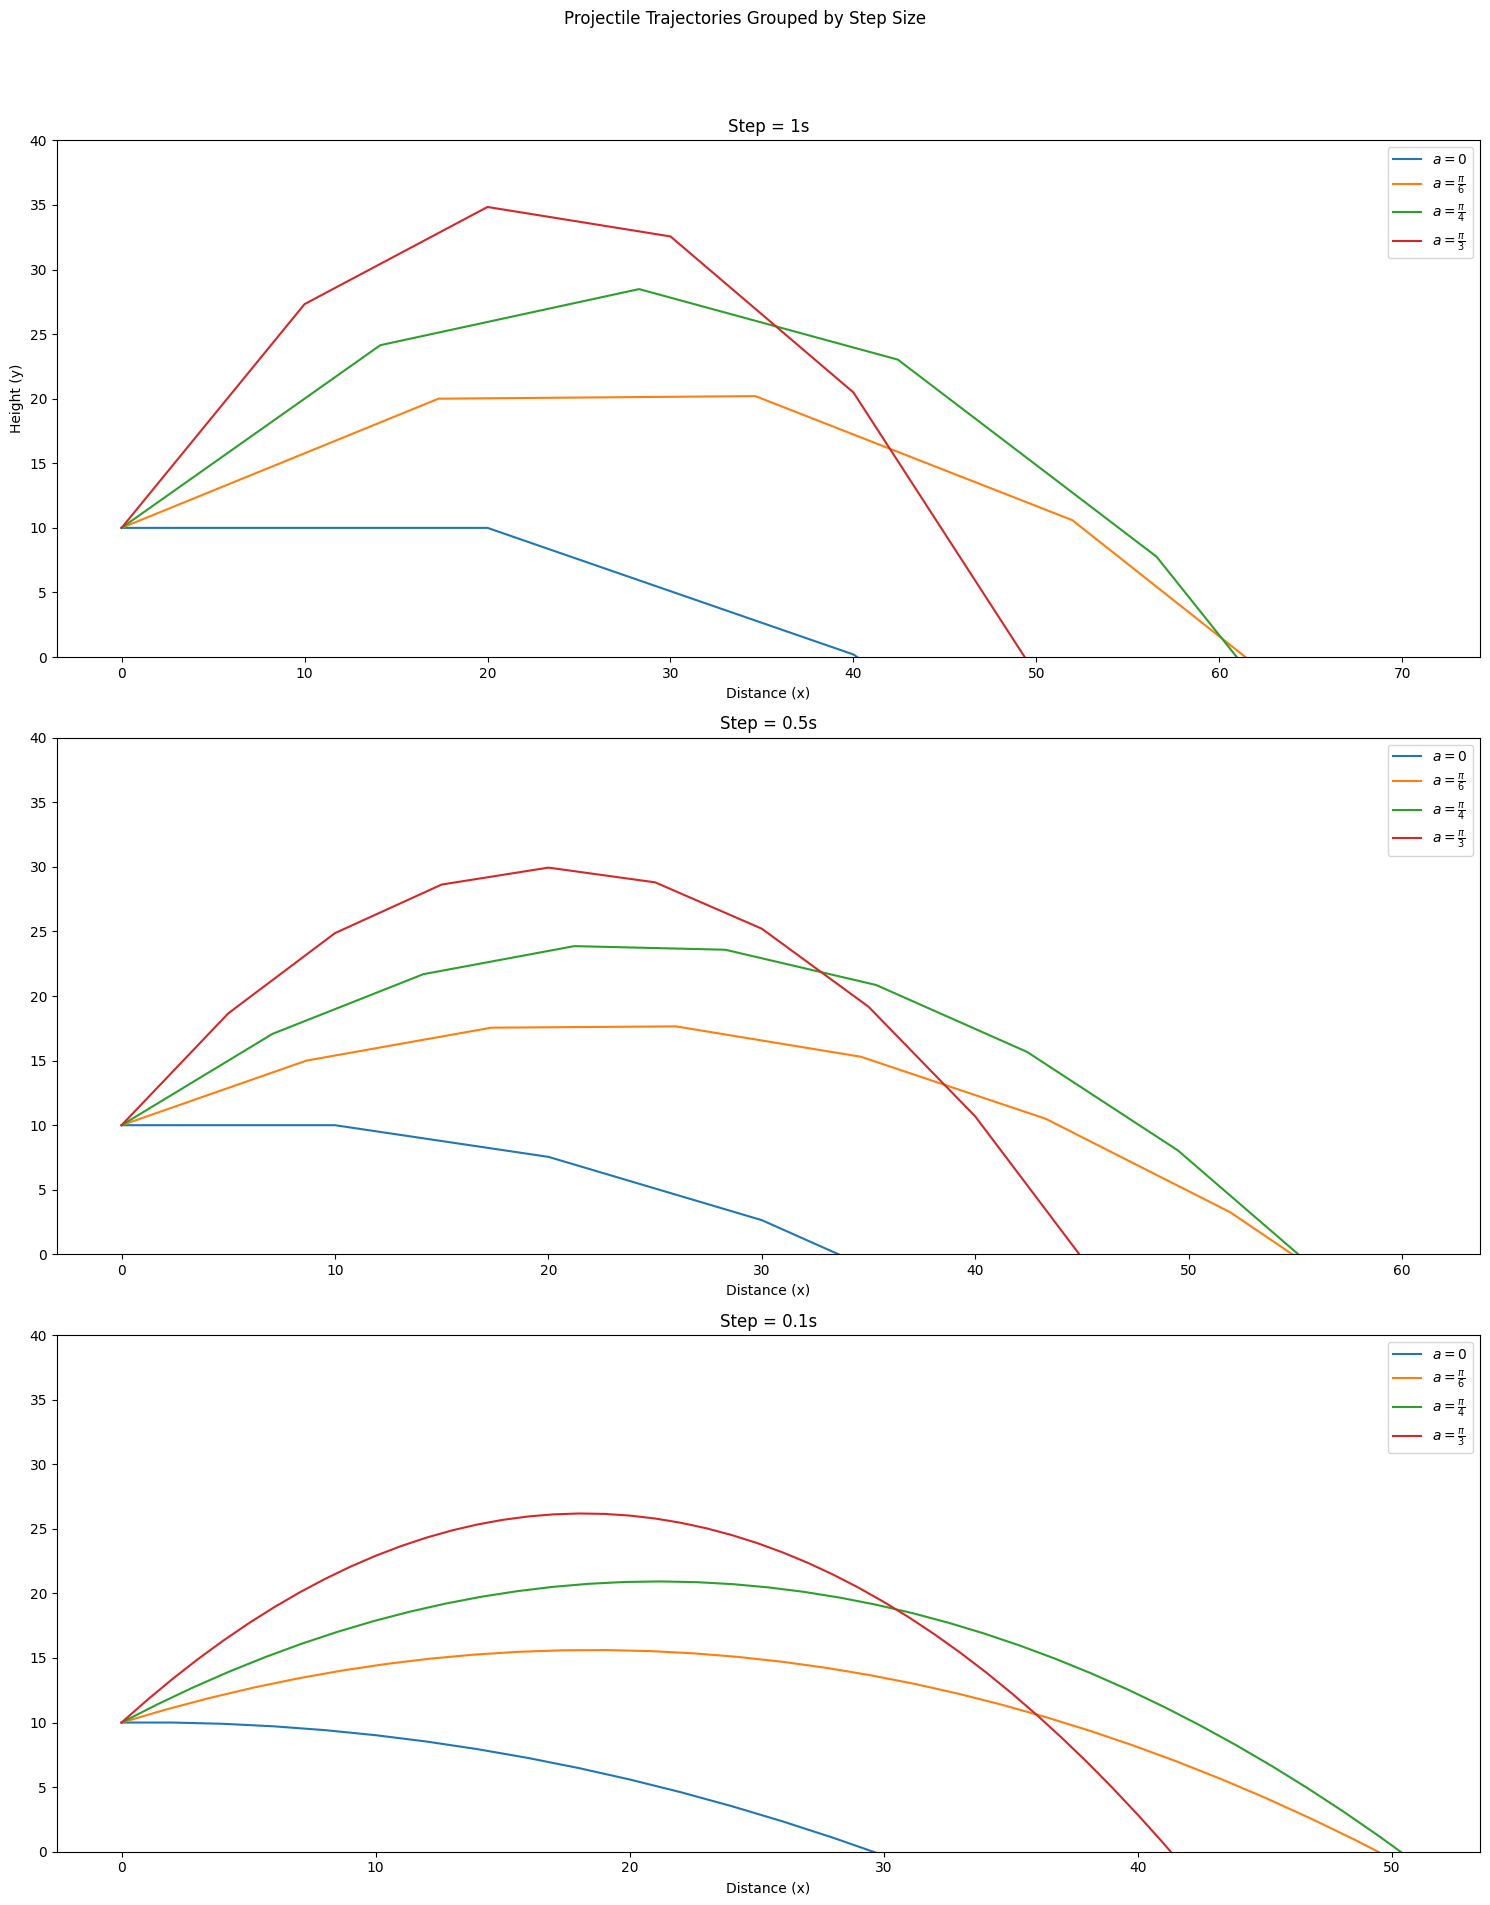

In [40]:

# Define the angles and their string representations in terms of pi
angles = [
    (0, "0"),
    (np.pi / 6, r"\frac{\pi}{6}"),
    (np.pi / 4, r"\frac{\pi}{4}"),
    (np.pi / 3, r"\frac{\pi}{3}")
]
steps = [1, 0.5, 0.1]

fig, axs = plt.subplots(3, 1, figsize=(15, 20), sharey=True)
for idx, step in enumerate(steps):
    ax = axs[idx]
    for a, a_label in angles:
        v_x, v_y, x, y = discrete_difference_model_trajectory(a=a, step=step)
        v_x = np.array(tuple(v_x.values()))
        v_y = np.array(tuple(v_y.values()))
        x = np.array(tuple(x.values()))
        y = np.array(tuple(y.values()))
        label = f"$a={a_label}$"
        ax.plot(x, y, label=label)
    ax.set_xlabel("Distance (x)")
    if idx == 0:
        ax.set_ylabel("Height (y)")
    ax.set_title(f"Step = {step}s")
    ax.legend()
    ax.set_ylim([0, 40])  # Set y-axis limits to [0, 40]

fig.suptitle("Projectile Trajectories Grouped by Step Size")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()